In [1]:
import pandas as pd
import sqlite3
import numpy as np
import warnings
# Suppress warnings:
warnings.filterwarnings("ignore")

### READ DATA, UPLOAD TO SQL:

# Reading data:
# Assigning column names:
column_names = ["unit_number", "time (cycles)", "operational setting 1", "operational setting 2",
                "operational setting 3"] + [f"sensor {i}" for i in range(1,24)]
# Reading train data:
train = pd.read_csv("train_FD001.txt", sep = " ", header = None, names = column_names).dropna(axis = 1,
                                                                                              how = "all")
# Adding RUL (Remaining Unit Life) column to train dataframe:
train["RUL"] = train.groupby("unit_number")["time (cycles)"].transform("max")-train["time (cycles)"]

# Reading test data:
test = pd.read_csv("test_FD001.txt", sep = " ", header = None, names = column_names).dropna(axis = 1,
                                                                                            how = "all")
# Adding true RUL to test dataframe as provided by NASA (used to test learning models):
rul_true = pd.read_csv("RUL_FD001.txt", header = None, names = ["RUL_true"])
test["RUL_true"] = test.groupby("unit_number").ngroup().map(rul_true["RUL_true"])

# Uploading data to SQL:
database = sqlite3.connect("sensor_data.db")
train.to_sql("sensor_data", database, if_exists="replace", index = False)

# test query to see units with highest RUL:
test_query = "SELECT unit_number, RUL FROM sensor_data GROUP BY unit_number ORDER BY RUL DESC"
query_results = pd.read_sql(test_query, database)
print(query_results)

    unit_number  RUL
0            69  361
1            92  340
2            96  335
3            67  312
4            83  292
..          ...  ...
95           24  146
96           70  136
97           57  136
98           91  134
99           39  127

[100 rows x 2 columns]


In [2]:
### DATA CLEANING:

# Display all column info, do not truncate any columns:
pd.set_option("display.max_columns", None)
print(train.head())
print(train.info())
train.describe()

   unit_number  time (cycles)  operational setting 1  operational setting 2  \
0            1              1                -0.0007                -0.0004   
1            1              2                 0.0019                -0.0003   
2            1              3                -0.0043                 0.0003   
3            1              4                 0.0007                 0.0000   
4            1              5                -0.0019                -0.0002   

   operational setting 3  sensor 1  sensor 2  sensor 3  sensor 4  sensor 5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   sensor 6  sensor 7  sensor 8  sensor 9  sensor 10  se

unit_number  time (cycles)  operational setting 1  \
count  20631.000000   20631.000000           20631.000000   
mean      51.506568     108.807862              -0.000009   
std       29.227633      68.880990               0.002187   
min        1.000000       1.000000              -0.008700   
25%       26.000000      52.000000              -0.001500   
50%       52.000000     104.000000               0.000000   
75%       77.000000     156.000000               0.001500   
max      100.000000     362.000000               0.008700   

       operational setting 2  operational setting 3      sensor 1  \
count           20631.000000                20631.0  2.063100e+04   
mean                0.000002                  100.0  5.186700e+02   
std                 0.000293                    0.0  6.537152e-11   
min                -0.000600                  100.0  5.186700e+02   
25%                -0.000200                  100.0  5.186700e+02   
50%                 0.000000                  100.0  5.186700e+02   
75%                 0.000300                  100.0  5.186700e+02   
max                 0.000600                  100.0  5.186700e+02   

           sensor 2      sensor 3      sensor 4      sensor 5      sensor 6  \
count  20631.000000  20631.000000  20631.000000  2.063100e+04  20631.000000   
mean     642.680934   1590.523119   1408.933782  1.462000e+01     21.609803   
std        0.500053      6.131150      9.000605  3.394700e-12      0.001389   
min      641.210000   1571.040000   1382.250000  1.462000e+01     21.600000   
25%      642.325000   1586.260000   1402.360000  1.462000e+01     21.610000   
50%      642.640000   1590.100000   1408.040000  1.462000e+01     21.610000   
75%      643.000000   1594.380000   1414.555000  1.462000e+01     21.610000   
max      644.530000   1616.910000   1441.490000  1.462000e+01     21.610000   

           sensor 7      sensor 8      sensor 9     sensor 10     sensor 11  \
count  20631.000000  20631.000000  20631.000000  2.063100e+04  20631.000000   
mean     553.367711   2388.096652   9065.242941  1.300000e+00     47.541168   
std        0.885092      0.070985     22.082880  4.660829e-13      0.267087   
min      549.850000   2387.900000   9021.730000  1.300000e+00     46.850000   
25%      552.810000   2388.050000   9053.100000  1.300000e+00     47.350000   
50%      553.440000   2388.090000   9060.660000  1.300000e+00     47.510000   
75%      554.010000   2388.140000   9069.420000  1.300000e+00     47.700000   
max      556.060000   2388.560000   9244.590000  1.300000e+00     48.530000   

          sensor 12     sensor 13     sensor 14     sensor 15     sensor 16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.556432e-14   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

          sensor 17  sensor 18  sensor 19     sensor 20     sensor 21  \
count  20631.000000    20631.0    20631.0  20631.000000  20631.000000   
mean     393.210654     2388.0      100.0     38.816271     23.289705   
std        1.548763        0.0        0.0      0.180746      0.108251   
min      388.000000     2388.0      100.0     38.140000     22.894200   
25%      392.000000     2388.0      100.0     38.700000     23.221800   
50%      393.000000     2388.0      100.0     38.830000     23.297900   
75%      394.000000     2388.0      100.0     38.950000     23.366800   
max      400.000000     2388.0      100.0     39.430000     23.618400   

                RUL  
count  20631.000000 

In [3]:
# Reset column info display:
pd.reset_option("display.max_columns")
# Further inspect operational setting 3, sensors 1, 5, 10, 16, 18, 19:
print(f"operational setting 3 unique values: {train["operational setting 3"].nunique()}")
sensors = ["sensor 1", "sensor 5", "sensor 10", "sensor 16", "sensor 18", "sensor 19"]
print(f"Sensors unique values: {train.loc[:,sensors].nunique().tolist()}")

# From describe() and nunique(), it is clear that operational setting 3 and sensors listed above are
# unnecessary noise in our data. Hence, we drop them:
train = train.drop(["operational setting 3"] + sensors, axis = 1)
train.head()

operational setting 3 unique values: 1
Sensors unique values: [1, 1, 1, 1, 1, 1]


unit_number  time (cycles)  operational setting 1  operational setting 2  \
0            1              1                -0.0007                -0.0004   
1            1              2                 0.0019                -0.0003   
2            1              3                -0.0043                 0.0003   
3            1              4                 0.0007                 0.0000   
4            1              5                -0.0019                -0.0002   

   sensor 2  sensor 3  sensor 4  sensor 6  sensor 7  sensor 8  sensor 9  \
0    641.82   1589.70   1400.60     21.61    554.36   2388.06   9046.19   
1    642.15   1591.82   1403.14     21.61    553.75   2388.04   9044.07   
2    642.35   1587.99   1404.20     21.61    554.26   2388.08   9052.94   
3    642.35   1582.79   1401.87     21.61    554.45   2388.11   9049.48   
4    642.37   1582.85   1406.22     21.61    554.00   2388.06   9055.15   

   sensor 11  sensor 12  sensor 13  sensor 14  sensor 15  sensor 17  \
0      47.47     521.66    2388.02    8138.62     8.4195        392   
1      47.49     522.28    2388.07    8131.49     8.4318        392   
2      47.27     522.42    2388.03    8133.23     8.4178        390   
3      47.13     522.86    2388.08    8133.83     8.3682        392   
4      47.28     522.19    2388.04    8133.80     8.4294        393   

   sensor 20  sensor 21  RUL  
0      39.06    23.4190  191  
1      39.00    23.4236  190  
2      38.95    23.3442  189  
3      38.88    23.3739  188  
4      38.90    23.4044  187

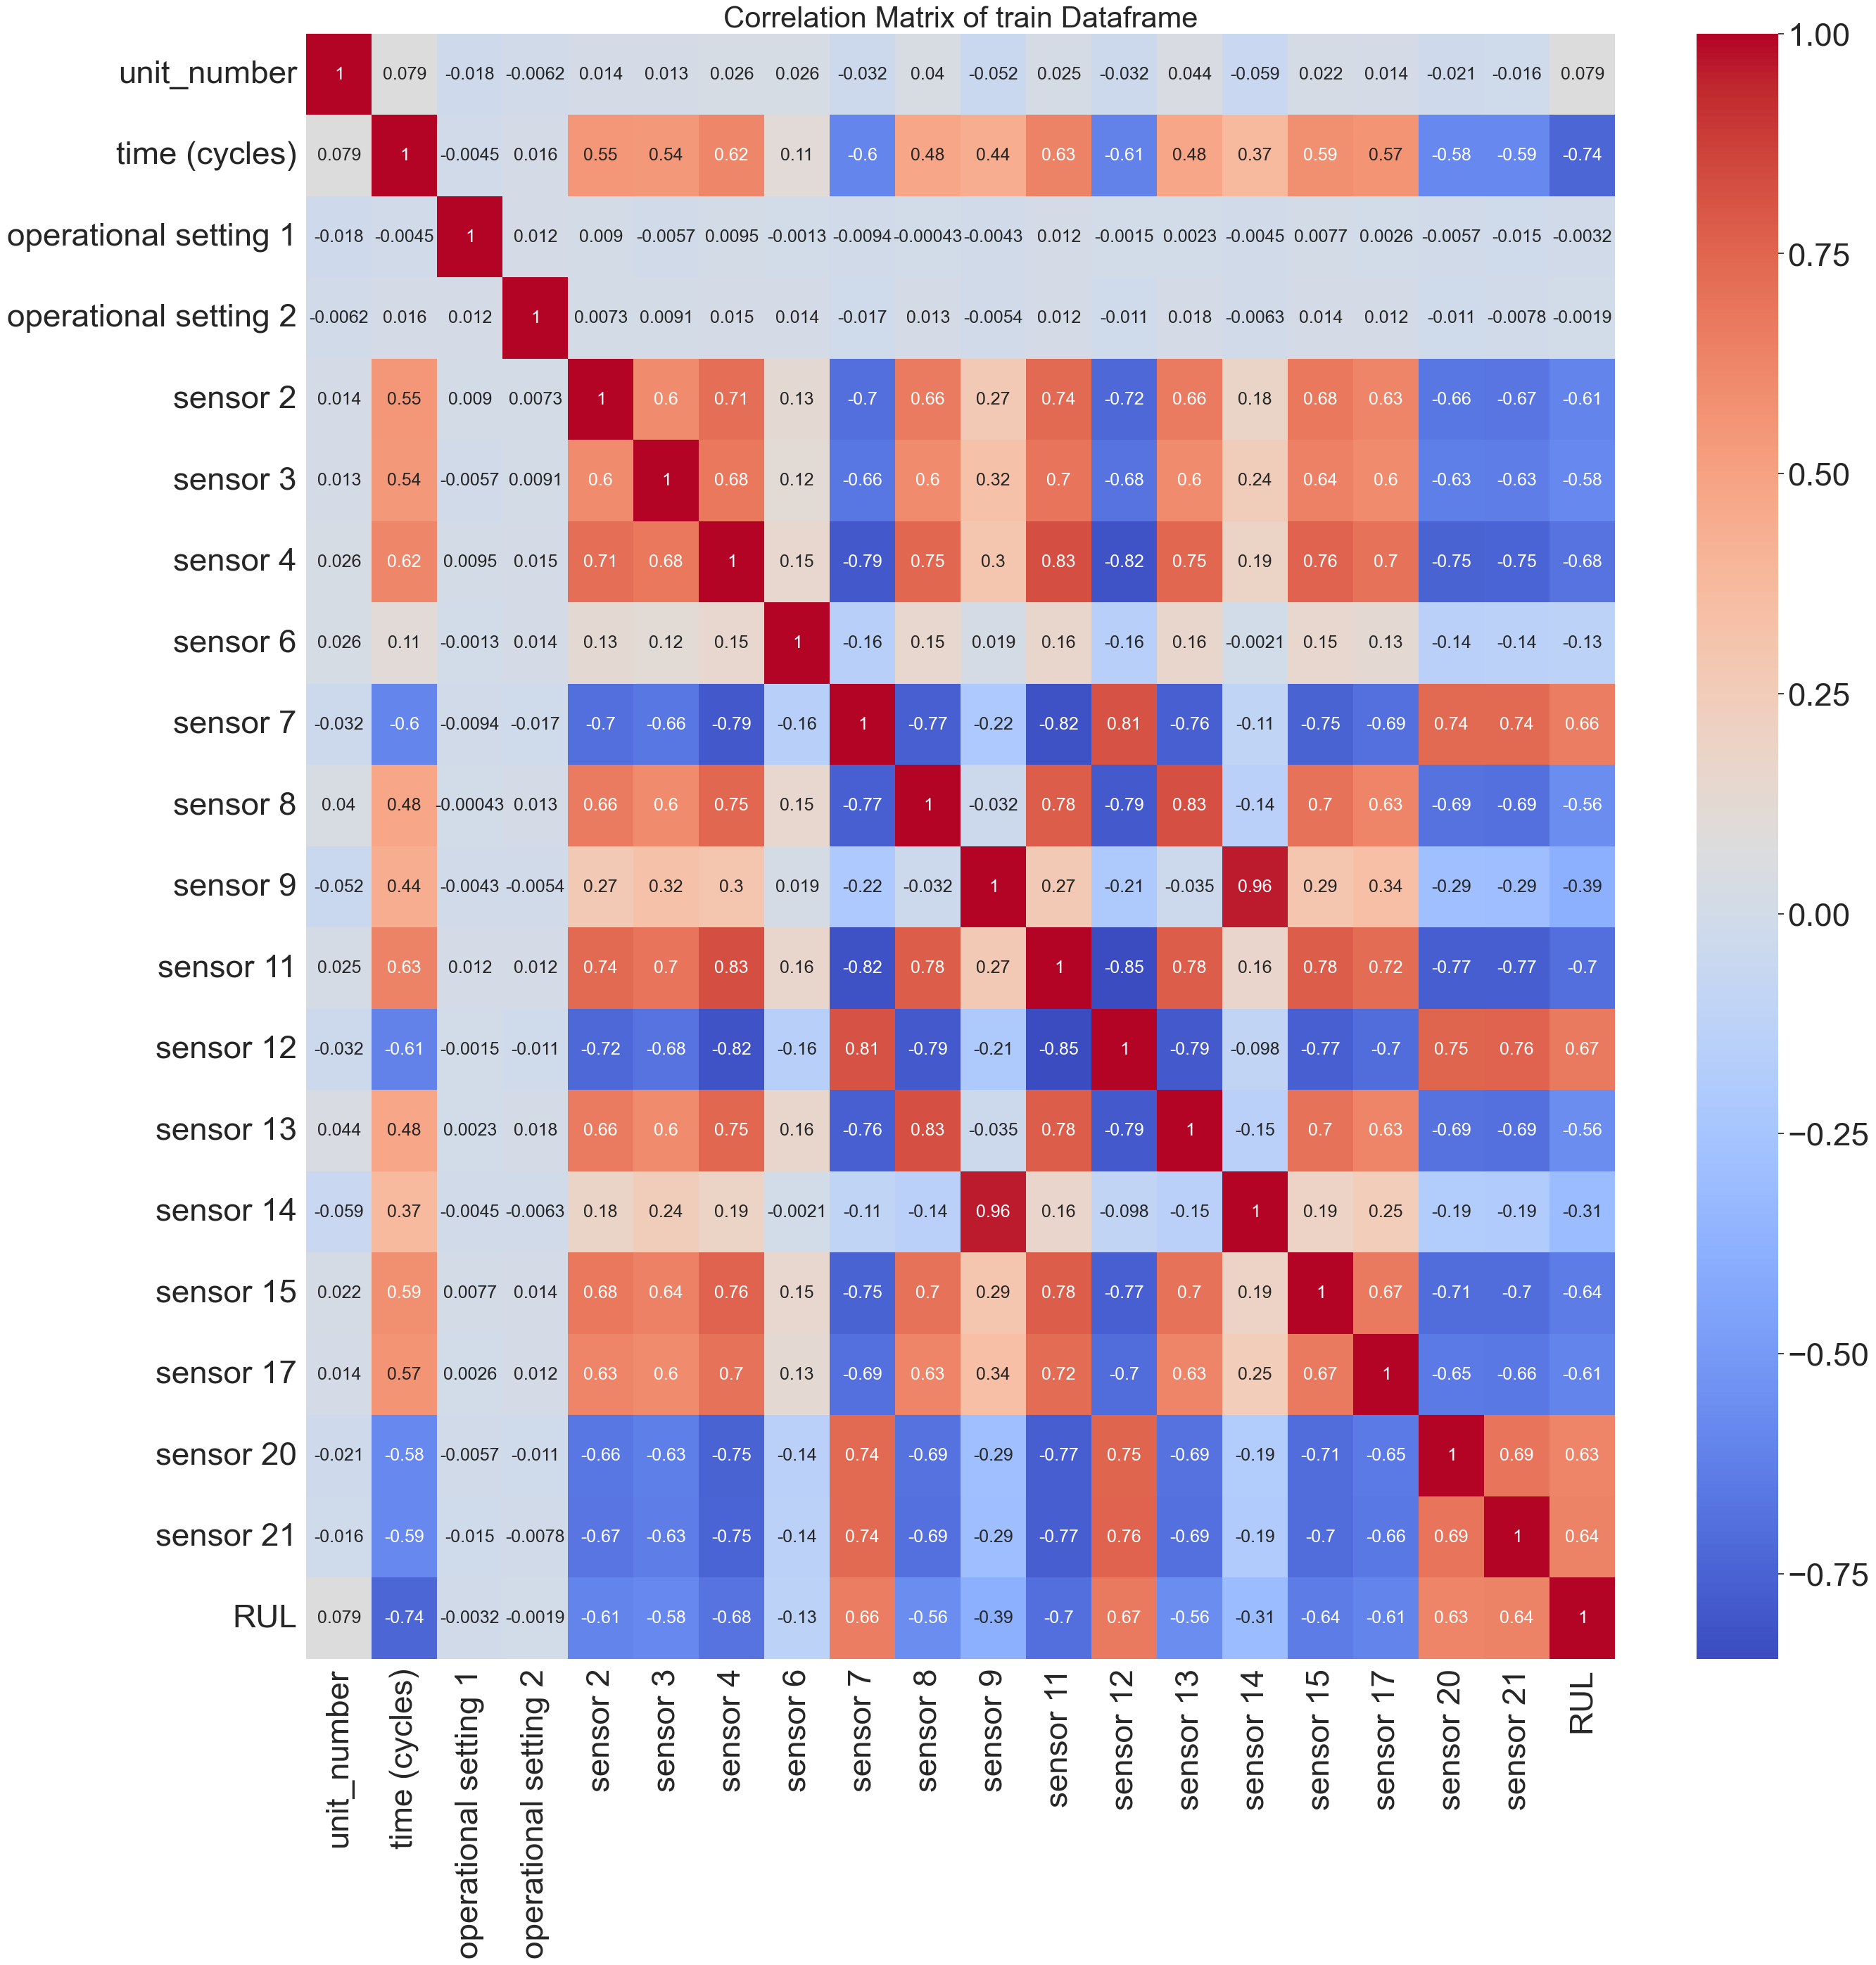

In [4]:
### DATA VISUALIZATION:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix:
plt.figure(figsize = (30,30))
sns.set(font_scale = 3)
sns.heatmap(train.corr(numeric_only=True), annot = True, cmap = "coolwarm", annot_kws = {"size": 18})
plt.title("Correlation Matrix of train Dataframe", fontsize= 30)
plt.show()

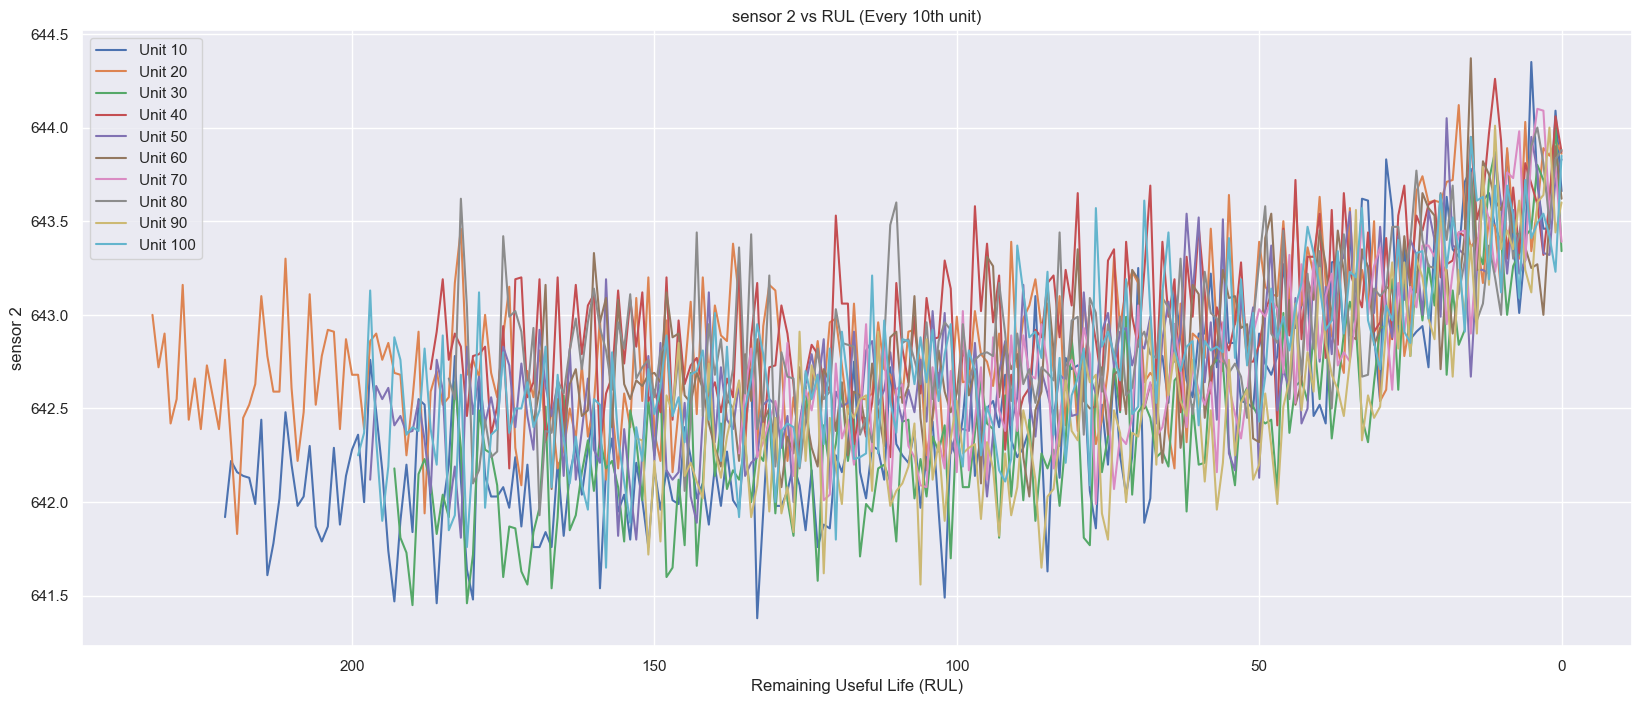

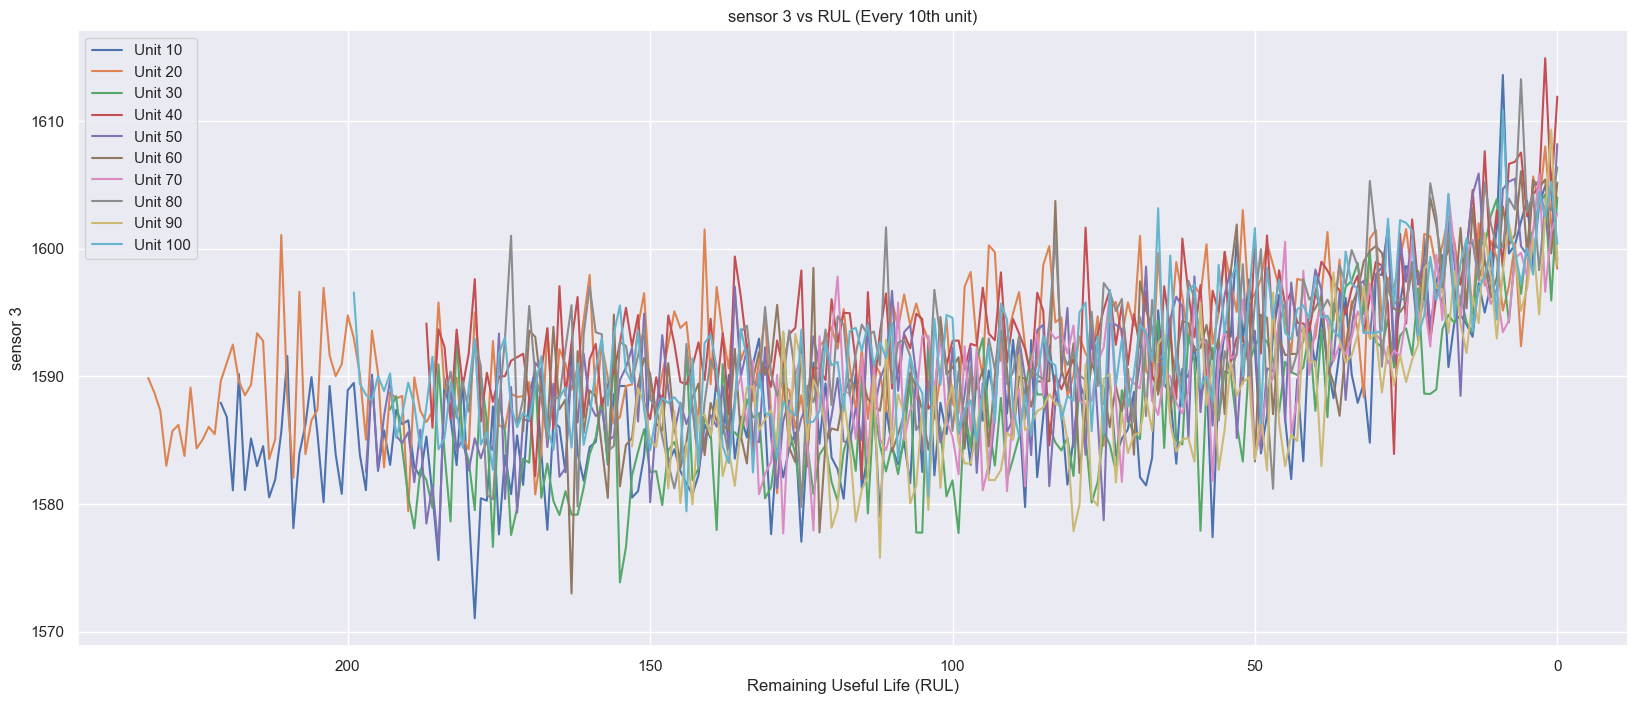

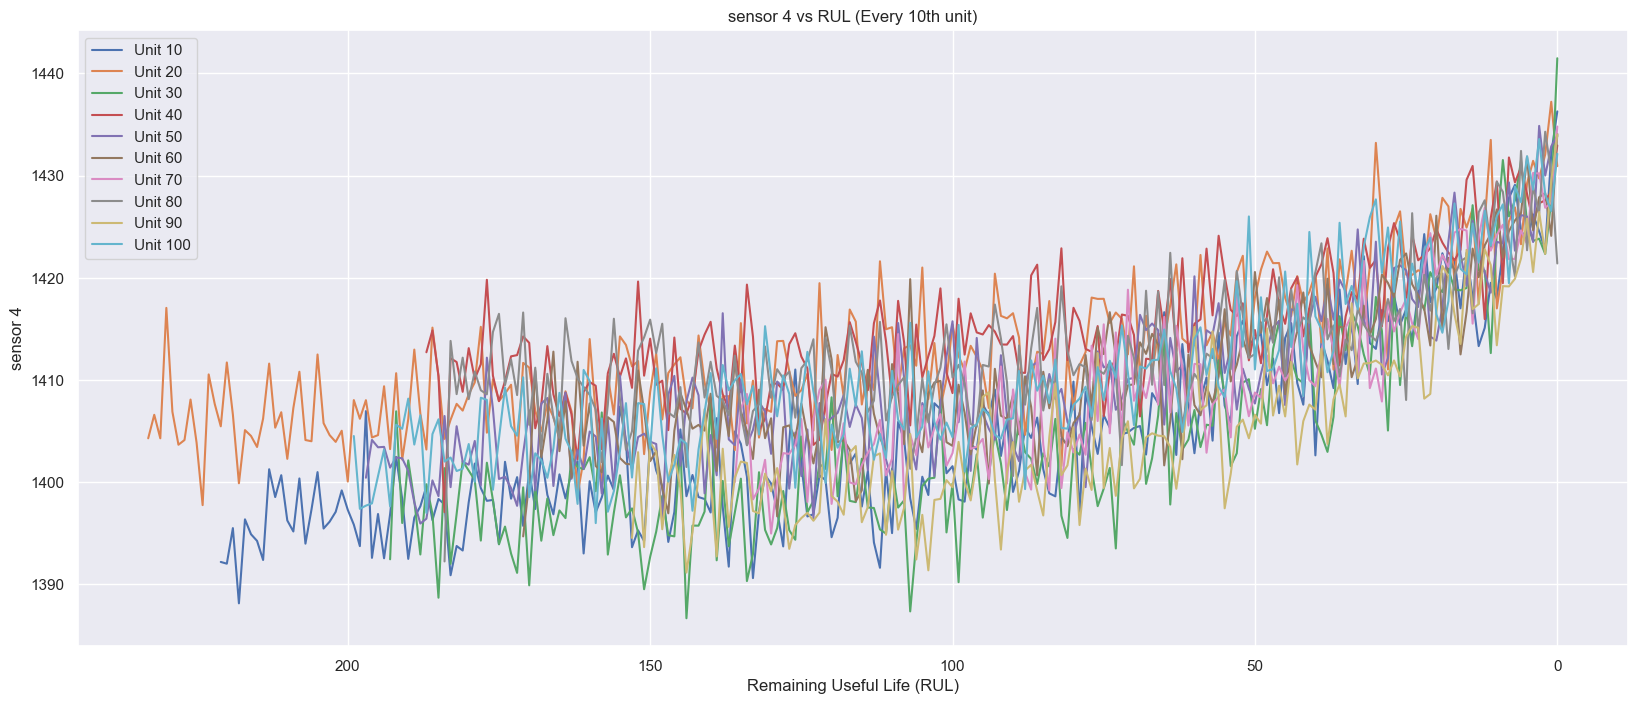

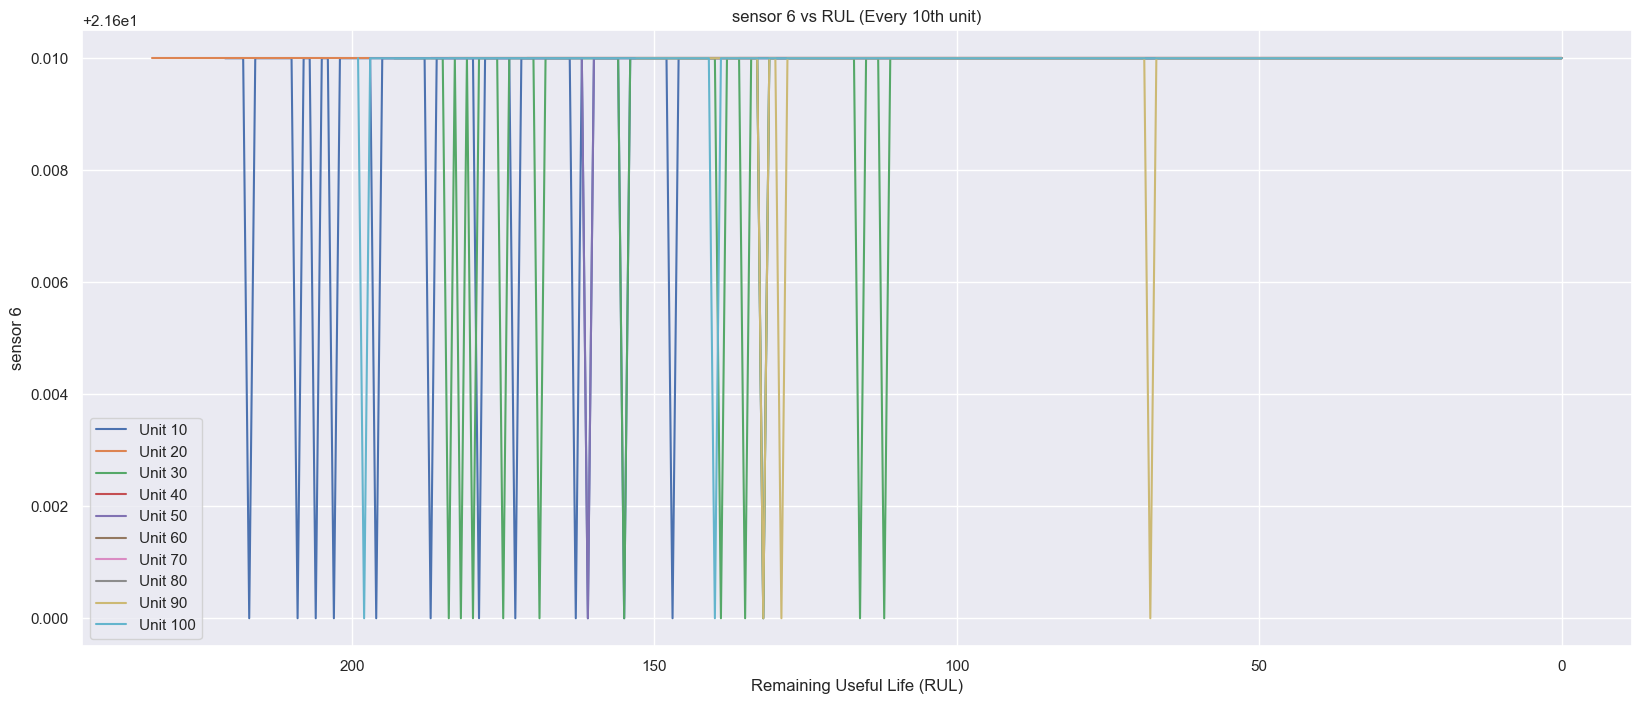

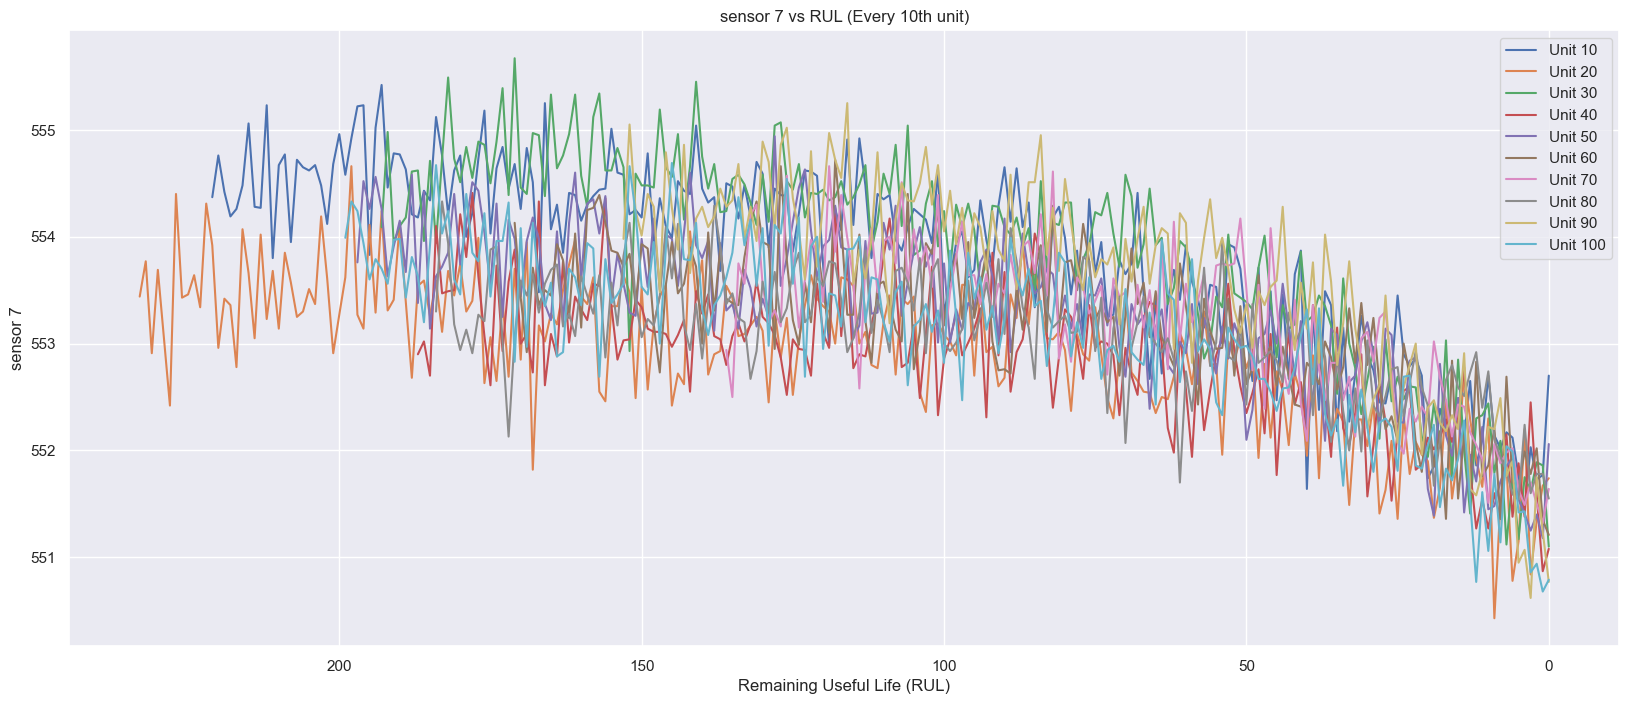

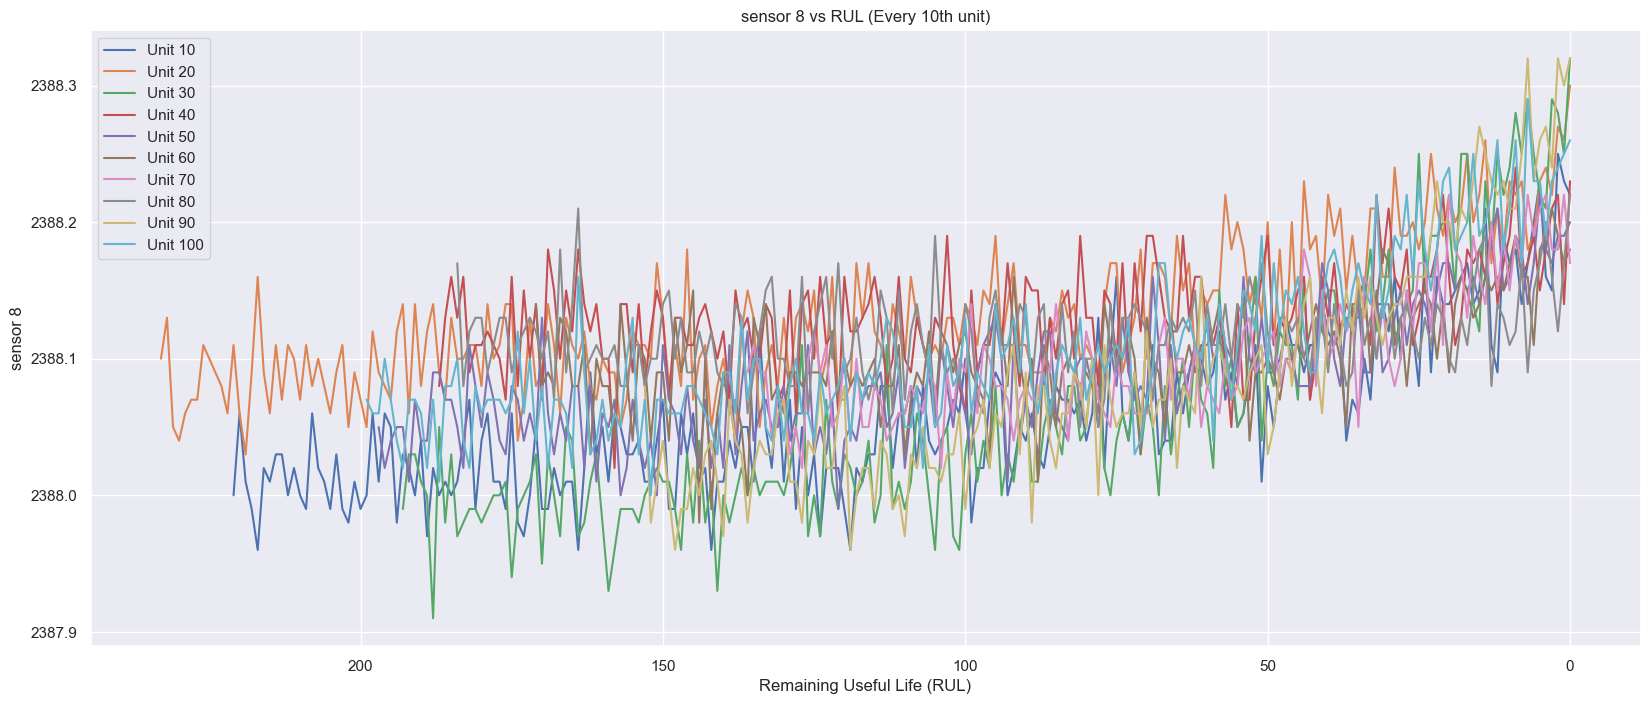

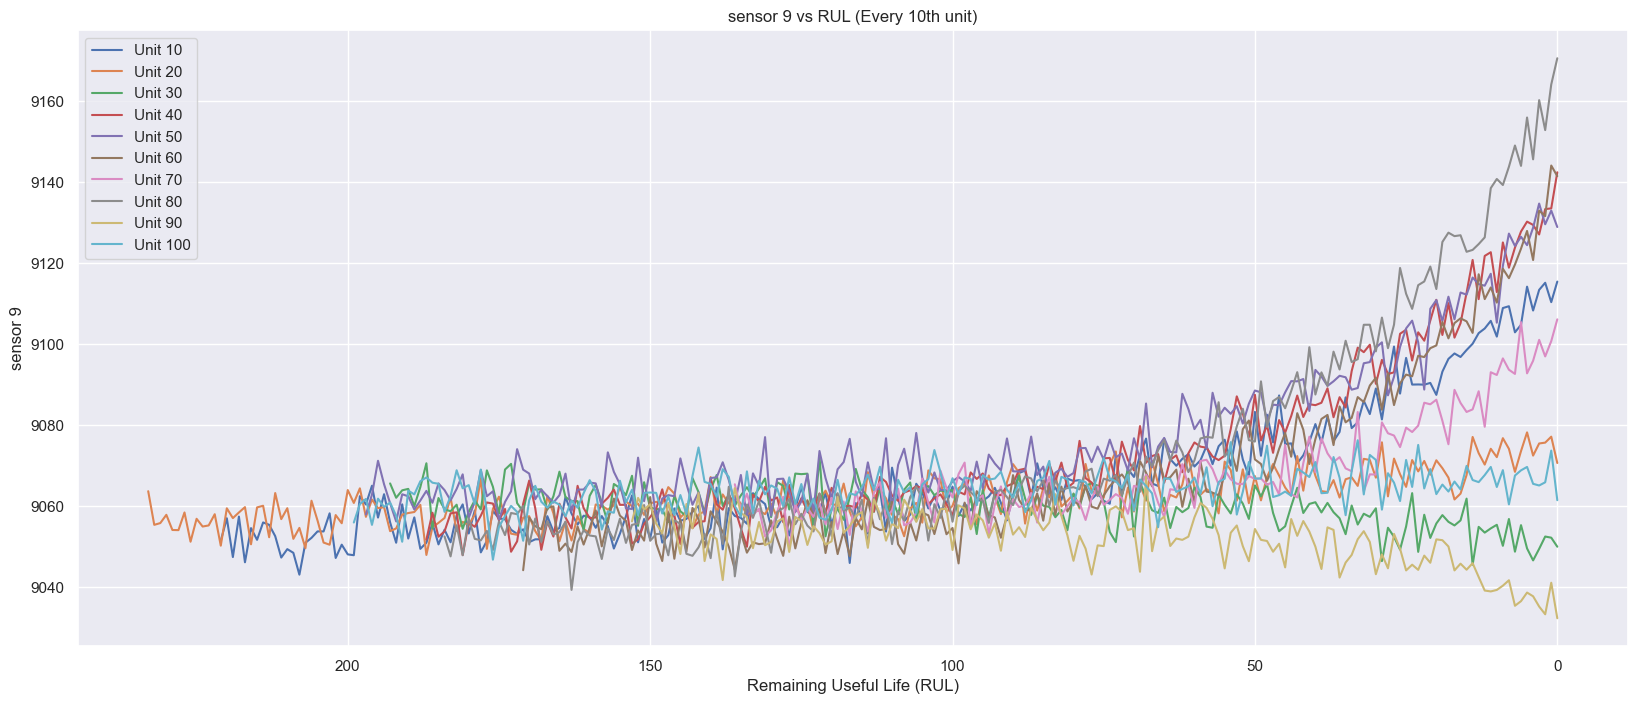

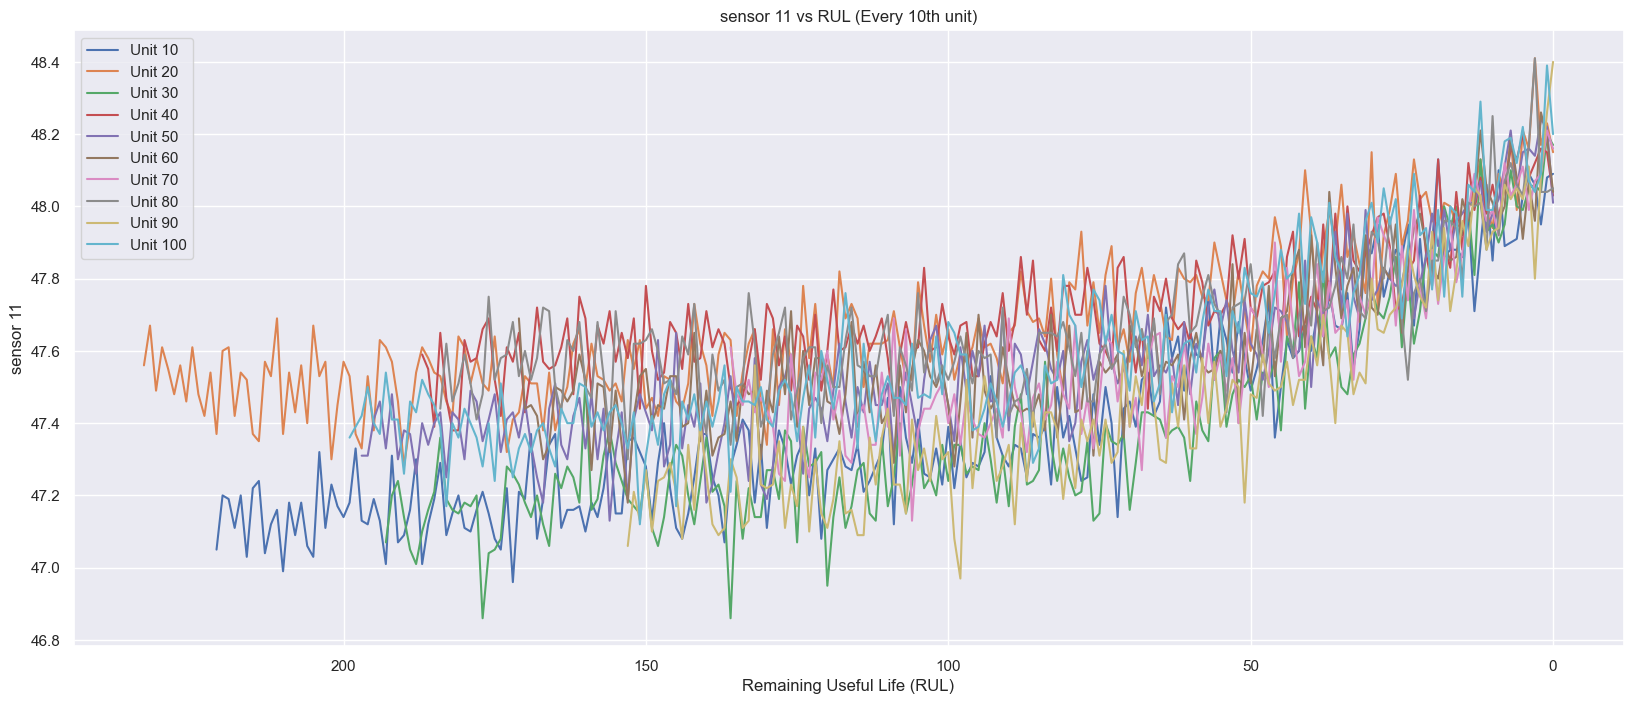

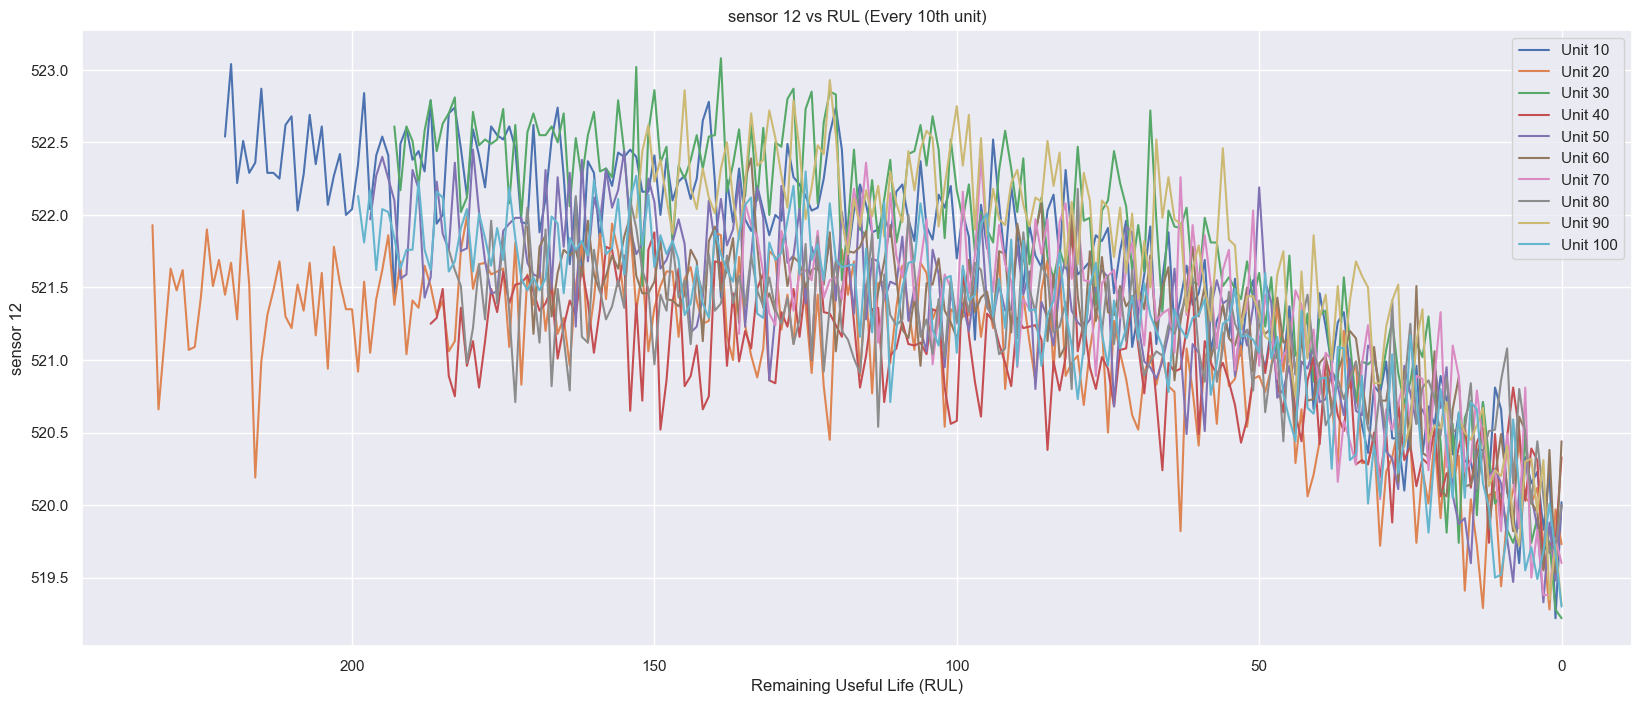

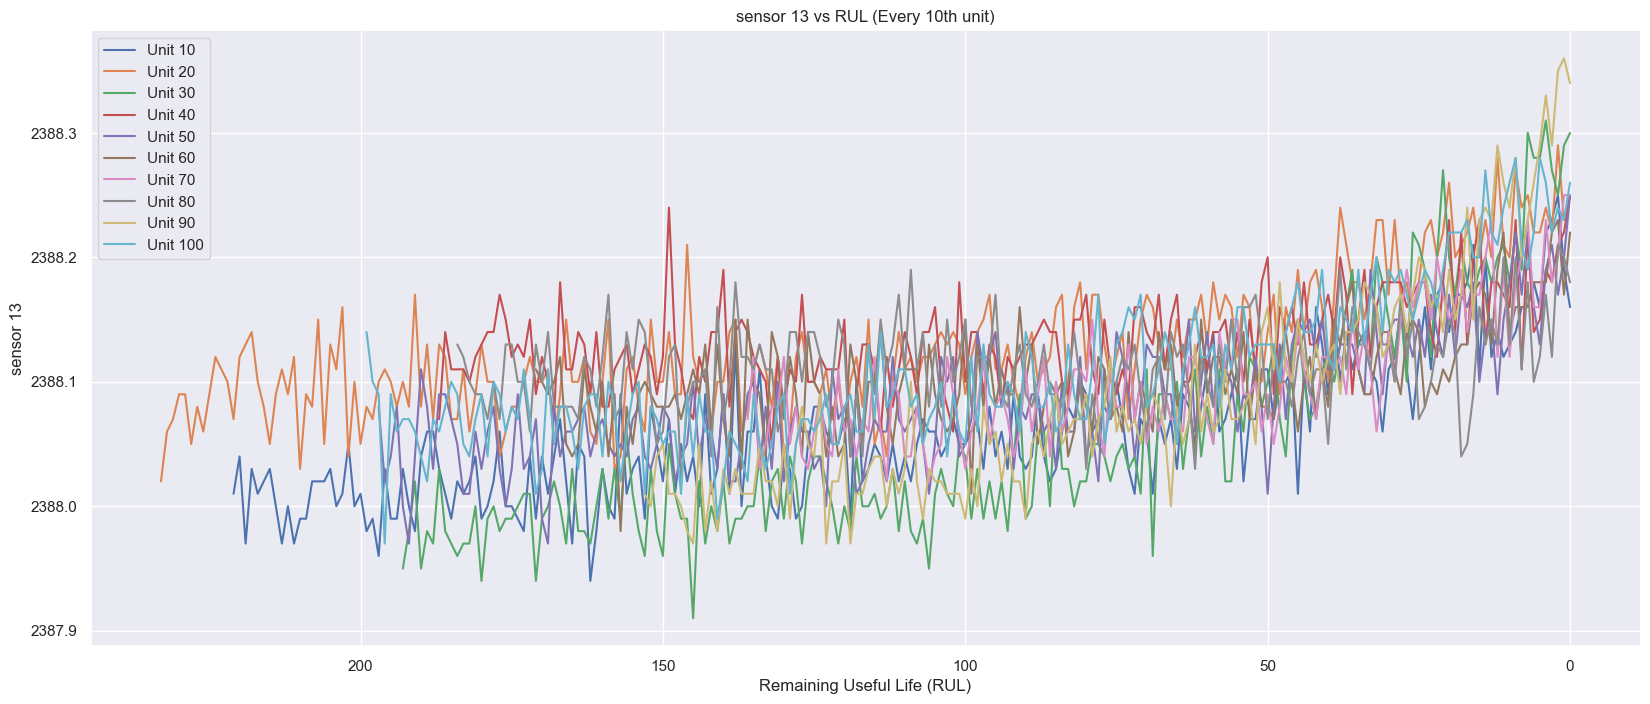

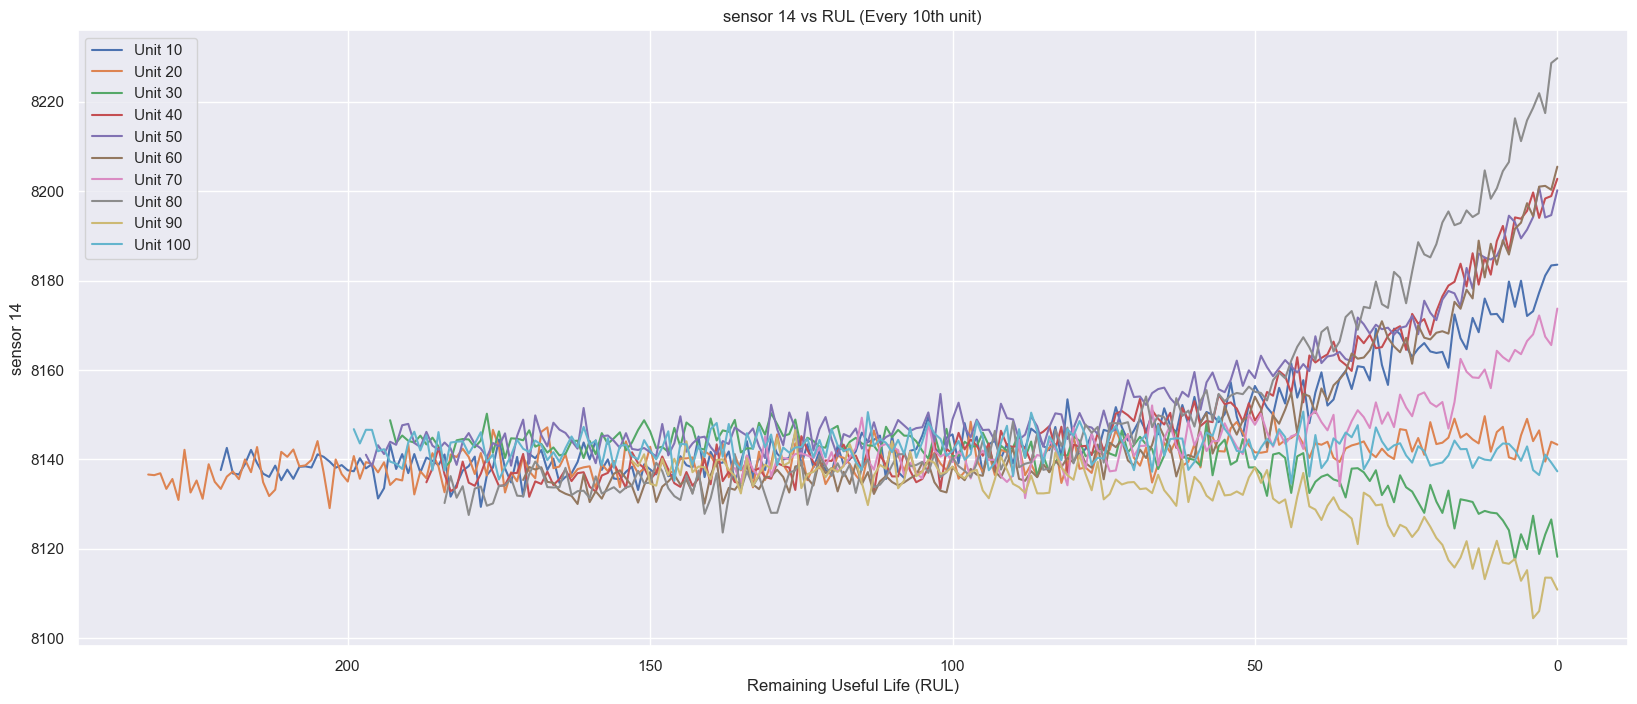

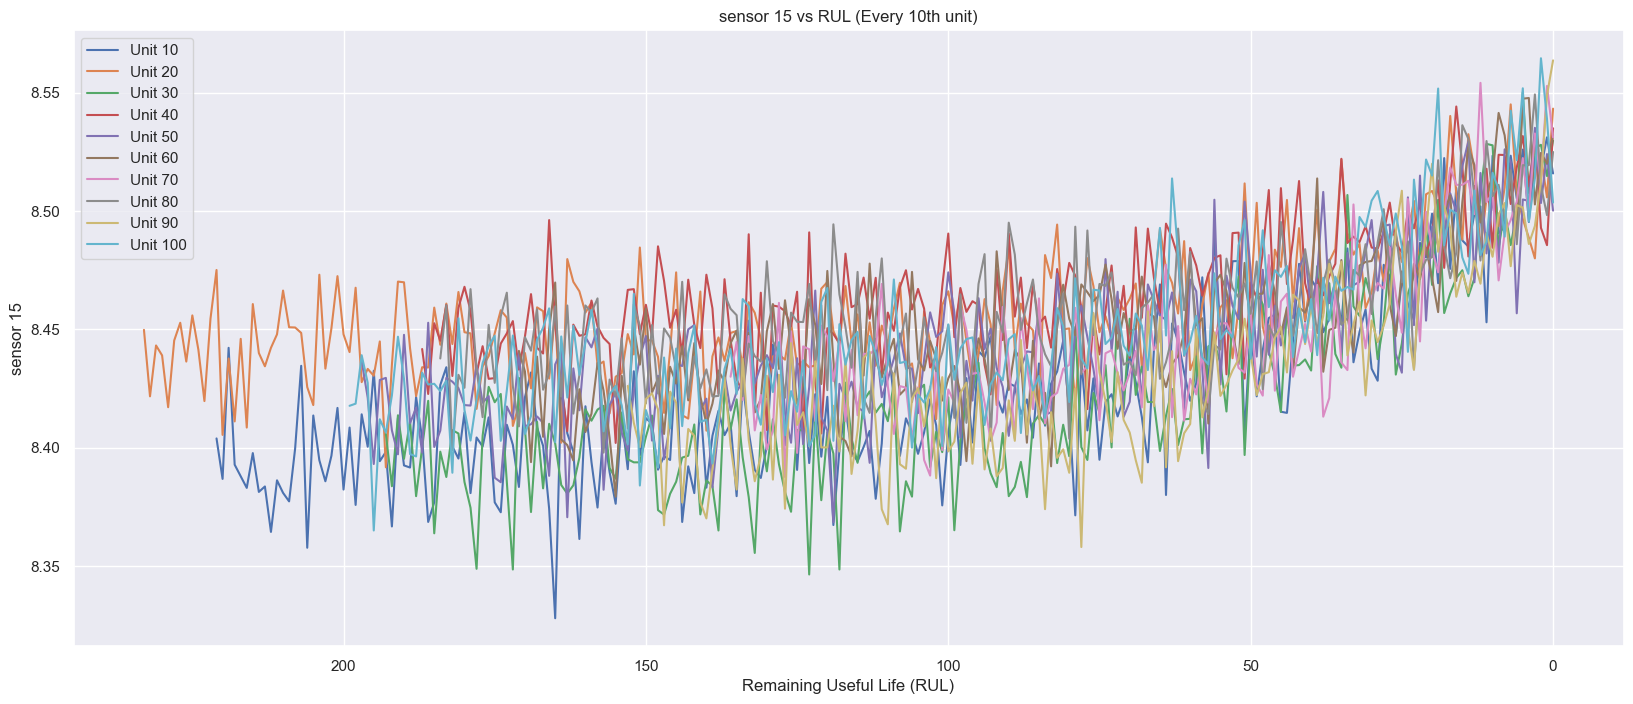

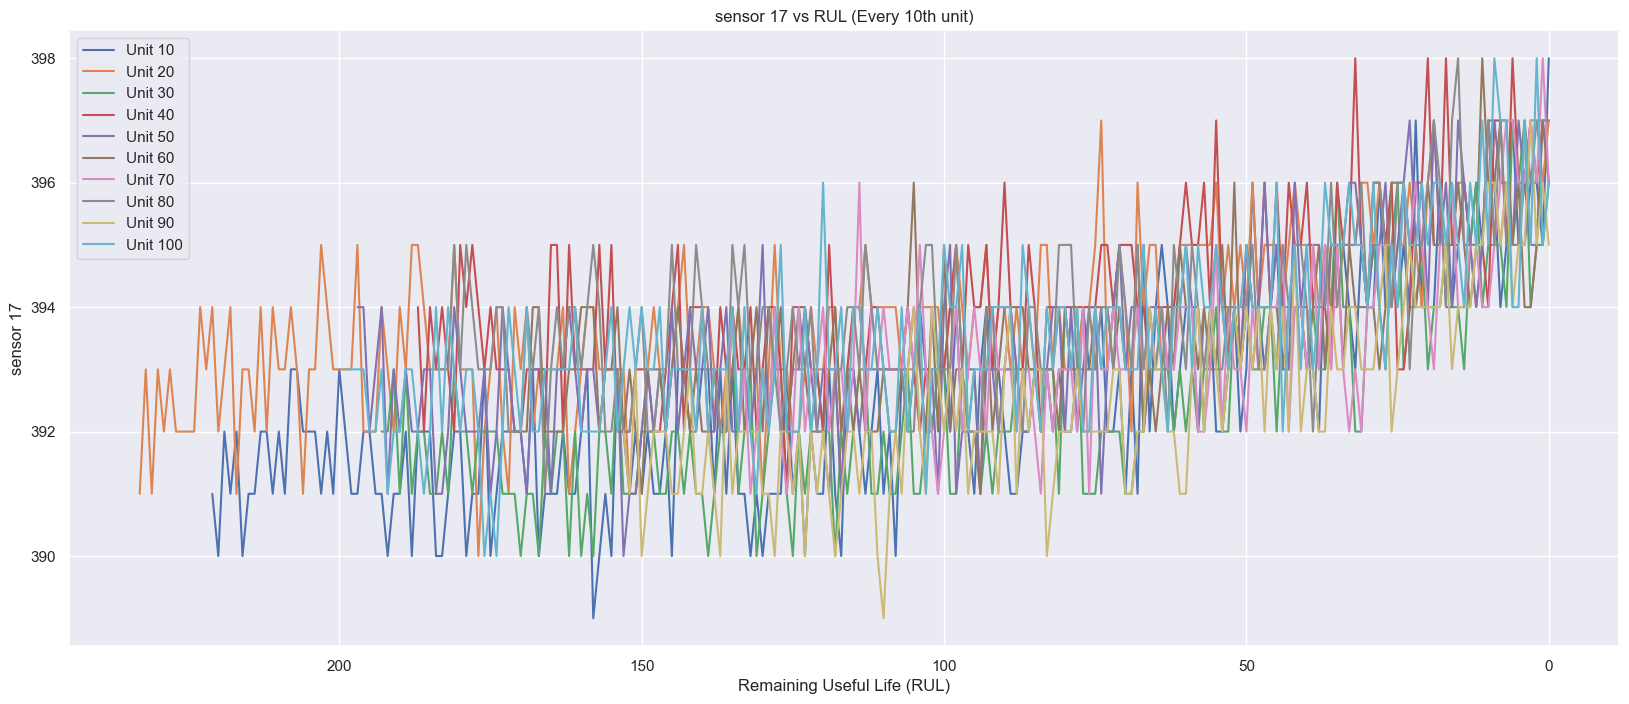

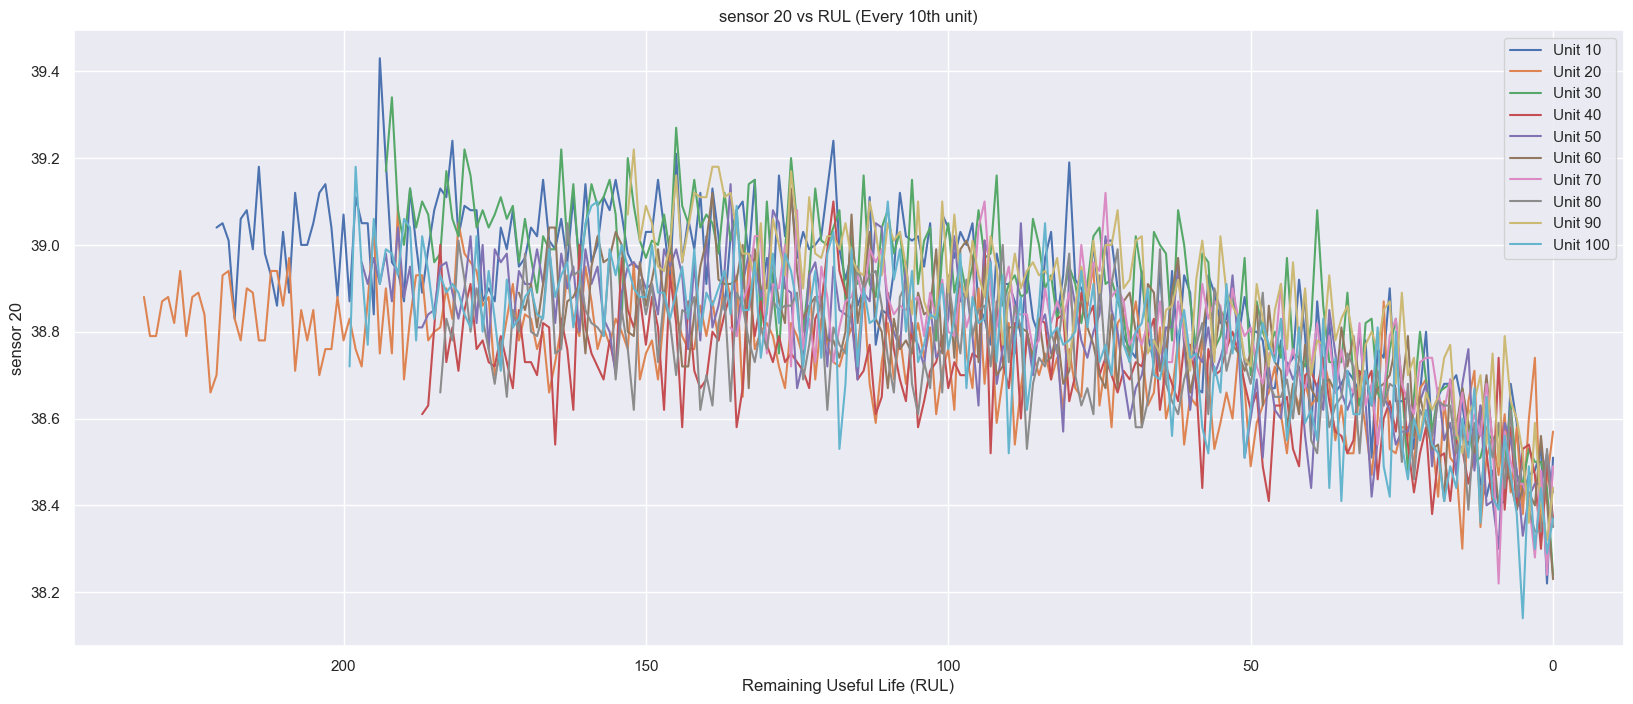

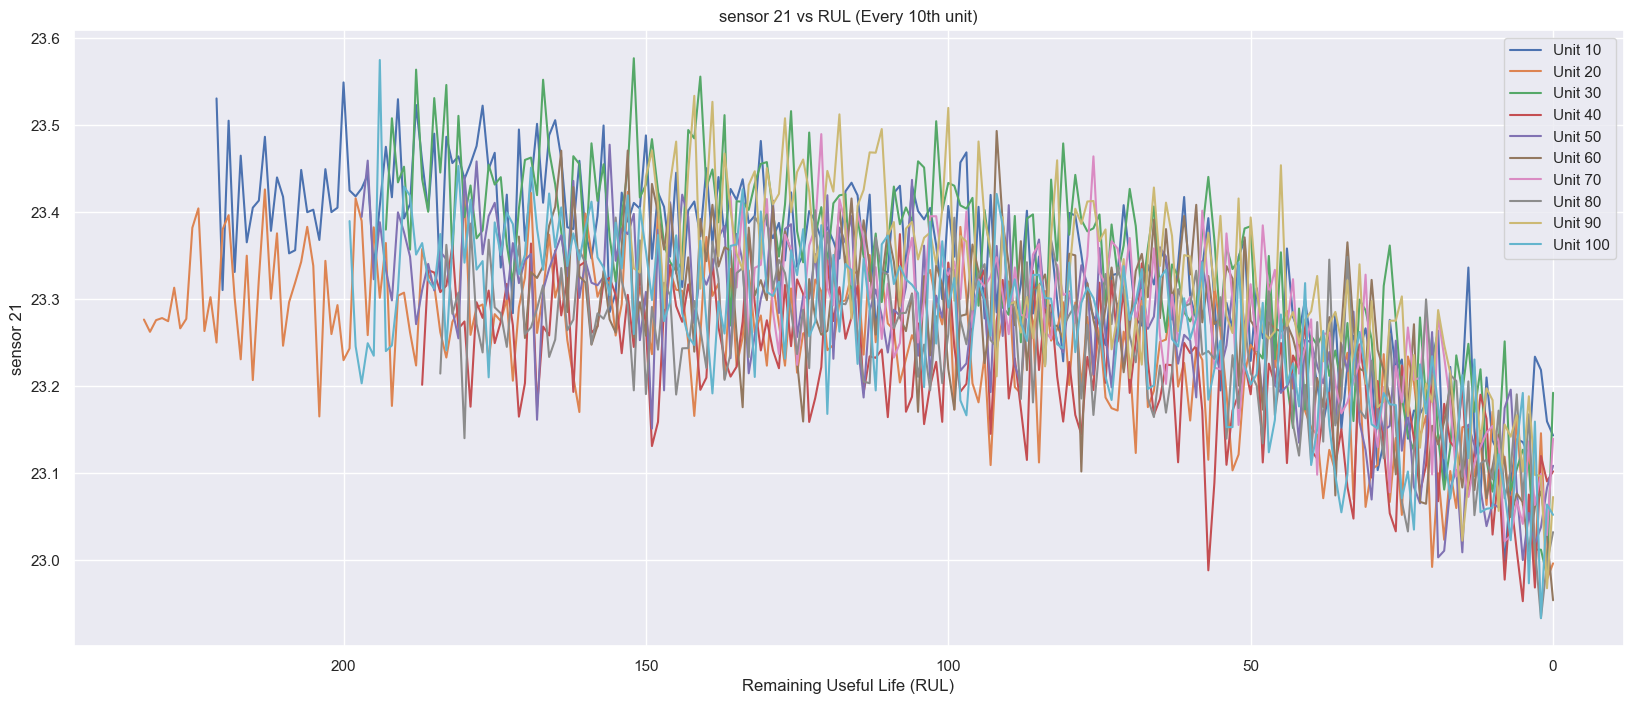

In [5]:
# Plots of every 10th unit's sensors vs RUL:
sns.set()
def sensor_plotter(sensor):
    plt.figure(figsize = (20,8))
    for i in train["unit_number"].unique():
        if(i % 10 == 0):
            unit = train[train["unit_number"] == i]
            plt.plot(unit["RUL"], unit[sensor], label = f"Unit {i}")
    plt.gca().invert_xaxis()
    plt.title(f"{sensor} vs RUL (Every 10th unit)")
    plt.xlabel("Remaining Useful Life (RUL)")
    plt.ylabel(f"{sensor}")
    plt.legend()
    plt.show()

# Plot for each sensor:
all_columns = train.columns.tolist()
sensor_2_idx = all_columns.index("sensor 2")
all_sensors = all_columns[sensor_2_idx:len(all_columns)-1]
for sensors in all_sensors:
    sensor_plotter(f"{sensors}")

In [6]:
### SELECTING DATA FOR TRAINING/TESTING:

# Select correlated features:
correlation = train.corr()

# Only select features that have > 0.5 correlation with RUL:
train_correlated_features = correlation[abs(correlation["RUL"])>=0.5]
train_correlated_features["RUL"]

time (cycles)   -0.736241
sensor 2        -0.606484
sensor 3        -0.584520
sensor 4        -0.678948
sensor 7         0.657223
sensor 8        -0.563968
sensor 11       -0.696228
sensor 12        0.671983
sensor 13       -0.562569
sensor 15       -0.642667
sensor 17       -0.606154
sensor 20        0.629428
sensor 21        0.635662
RUL              1.000000
Name: RUL, dtype: float64

In [7]:
# Choose only correlated sensors (and RUL for easy storing) and store them in a list:
all_correlated_sensors = train_correlated_features.index # Select column names
all_correlated_sensors = all_correlated_sensors[1:]
print(all_correlated_sensors)

# Only store above sensors in train/test dataframes:
train = train[["unit_number", "time (cycles)"] + list(all_correlated_sensors)]
test = test[["unit_number", "time (cycles)"] + list(all_correlated_sensors[:-1]) + ["RUL_true"]]

# Check structure of data:
train.info()
test.info()

Index(['sensor 2', 'sensor 3', 'sensor 4', 'sensor 7', 'sensor 8', 'sensor 11',
       'sensor 12', 'sensor 13', 'sensor 15', 'sensor 17', 'sensor 20',
       'sensor 21', 'RUL'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unit_number    20631 non-null  int64  
 1   time (cycles)  20631 non-null  int64  
 2   sensor 2       20631 non-null  float64
 3   sensor 3       20631 non-null  float64
 4   sensor 4       20631 non-null  float64
 5   sensor 7       20631 non-null  float64
 6   sensor 8       20631 non-null  float64
 7   sensor 11      20631 non-null  float64
 8   sensor 12      20631 non-null  float64
 9   sensor 13      20631 non-null  float64
 10  sensor 15      20631 non-null  float64
 11  sensor 17      20631 non-null  int64  
 12  sensor 20      20631 non-null  float64
 13  sensor 21      20631 non

In [8]:
### FEATURE ENGINEERING:

# Lag features (for highly correlated sensors (> 0.65)):
for sensor in ["sensor 4", "sensor 12", "sensor 7", "sensor 11"]:
    train[f"{sensor}_lag_1"] = train.groupby("unit_number")[sensor].shift(1)
    test[f"{sensor}_lag_1"] = test.groupby("unit_number")[sensor].shift(1)

# Rolling features (mean/standard deviation) (noisy but still highly correlated (> 0.60)):
for sensor in ["sensor 21", "sensor 15", "sensor 20"]:
    train[f"{sensor}_r_mean_10"] = train.groupby("unit_number")[sensor].rolling(window = 10, min_periods=1).mean().values
    train[f"{sensor}_r_std_10"] = train.groupby("unit_number")[sensor].rolling(window = 10, min_periods = 1).std().values
    test[f"{sensor}_r_mean_10"] = test.groupby("unit_number")[sensor].rolling(window = 10, min_periods=1).mean().values
    test[f"{sensor}_r_std_10"] = test.groupby("unit_number")[sensor].rolling(window = 10, min_periods = 1).std().values

# Drop NaN values:
train = train.groupby("unit_number").apply(lambda x: x.ffill()).reset_index(drop = True) # reset index so pandas does not
                                                                                         # drop unit_number column
test = test.groupby("unit_number").apply(lambda x: x.ffill()).reset_index(drop = True)
train.dropna(inplace = True)
test.dropna(inplace = True)

# Aligning RUL_true with last cycles (only last cycles matter for RUL):
last_cycles = test.groupby("unit_number")["time (cycles)"].idxmax()
test["RUL_true"] = np.nan
test.loc[last_cycles, "RUL_true"] = rul_true["RUL_true"].values
display(train)
display(test)

unit_number  time (cycles)  sensor 2  sensor 3  sensor 4  sensor 7  \
1                1              2    642.15   1591.82   1403.14    553.75   
2                1              3    642.35   1587.99   1404.20    554.26   
3                1              4    642.35   1582.79   1401.87    554.45   
4                1              5    642.37   1582.85   1406.22    554.00   
5                1              6    642.10   1584.47   1398.37    554.67   
...            ...            ...       ...       ...       ...       ...   
20626          100            196    643.49   1597.98   1428.63    551.43   
20627          100            197    643.54   1604.50   1433.58    550.86   
20628          100            198    643.42   1602.46   1428.18    550.94   
20629          100            199    643.23   1605.26   1426.53    550.68   
20630          100            200    643.85   1600.38   1432.14    550.79   

       sensor 8  sensor 11  sensor 12  sensor 13  ...  sensor 4_lag_1  \
1       2388.04      47.49     522.28    2388.07  ...         1400.60   
2       2388.08      47.27     522.42    2388.03  ...         1403.14   
3       2388.11      47.13     522.86    2388.08  ...         1404.20   
4       2388.06      47.28     522.19    2388.04  ...         1401.87   
5       2388.02      47.16     521.68    2388.03  ...         1406.22   
...         ...        ...        ...        ...  ...             ...   
20626   2388.19      48.07     519.49    2388.26  ...         1431.90   
20627   2388.23      48.04     519.68    2388.22  ...         1428.63   
20628   2388.24      48.09     520.01    2388.24  ...         1433.58   
20629   2388.25      48.39     519.67    2388.23  ...         1428.18   
20630   2388.26      48.20     519.30    2388.26  ...         1426.53   

       sensor 12_lag_1  sensor 7_lag_1  sensor 11_lag_1  sensor 21_r_mean_10  \
1               521.66          554.36            47.47            23.421300   
2               522.28          553.75            47.49            23.395600   
3               522.42          554.26            47.27            23.390175   
4               522.86          554.45            47.13            23.393020   
5               522.19          554.00            47.28            23.388667   
...                ...             ...              ...                  ...   
20626           519.71          551.42            48.22            23.092540   
20627           519.49          551.43            48.07            23.085400   
20628           519.68          550.86            48.04            23.073210   
20629           520.01          550.94            48.09            23.073700   
20630           519.67          550.68            48.39            23.072890   

       sensor 21_r_std_10  sensor 15_r_mean_10  sensor 15_r_std_10  \
1                0.003253             8.425650            0.008697   
2                0.044573             8.423033            0.007640   
3                0.037977             8.409325            0.028117   
4                0.033498             8.413340            0.025953   
5                0.031803             8.412917            0.023236   
...                   ...                  ...                 ...   
20626            0.077684             8.510310            0.023486   
20627            0.065961             8.510830            0.023504   
20628            0.081577             8.519150            0.026468   
20629            0.081498             8.524340            0.024477   
20630            0.081686             8.523080            0.025254   

       sensor 20_r_mean_10  sensor 20_r_std_10  
1                39.030000            0.042426  
2                39.003333            0.055076  
3                38.972500            0.076322  
4                38.958000            0.073621  
5                38.961667            0.066458  
...                    ...                 ...  
20626            38.453000            0.154923  
20627      

unit_number  time (cycles)  sensor 2  sensor 3  sensor 4  sensor 7  \
1                1              2    641.71   1588.45   1395.42    554.85   
2                1              3    642.46   1586.94   1401.34    554.11   
3                1              4    642.44   1584.12   1406.42    554.07   
4                1              5    642.51   1587.19   1401.92    554.16   
5                1              6    642.11   1579.12   1395.13    554.22   
...            ...            ...       ...       ...       ...       ...   
13091          100            194    643.24   1599.45   1415.79    553.41   
13092          100            195    643.22   1595.69   1422.05    553.22   
13093          100            196    643.44   1593.15   1406.82    553.04   
13094          100            197    643.26   1594.99   1419.36    553.37   
13095          100            198    642.95   1601.62   1424.99    552.48   

       sensor 8  sensor 11  sensor 12  sensor 13  ...  sensor 4_lag_1  \
1       2388.01      47.50     522.16    2388.06  ...         1398.21   
2       2388.05      47.50     521.97    2388.03  ...         1395.42   
3       2388.03      47.28     521.38    2388.05  ...         1401.34   
4       2388.01      47.31     522.15    2388.03  ...         1406.42   
5       2388.00      47.26     521.92    2388.08  ...         1401.92   
...         ...        ...        ...        ...  ...             ...   
13091   2388.02      47.69     520.69    2388.00  ...         1414.62   
13092   2388.05      47.60     521.05    2388.09  ...         1415.79   
13093   2388.11      47.57     521.18    2388.04  ...         1422.05   
13094   2388.07      47.61     521.33    2388.08  ...         1406.82   
13095   2388.06      47.80     521.07    2388.05  ...         1419.36   

       sensor 12_lag_1  sensor 7_lag_1  sensor 11_lag_1  sensor 21_r_mean_10  \
1               521.72          553.90            47.20             23.38255   
2               522.16          554.85            47.50             23.39390   
3               521.97          554.11            47.50             23.38885   
4               521.38          554.07            47.28             23.39368   
5               522.15          554.16            47.31             23.38585   
...                ...             ...              ...                  ...   
13091           521.37          553.18            47.58             23.28929   
13092           520.69          553.41            47.69             23.28693   
13093           521.05          553.22            47.60             23.27511   
13094           521.18          553.04            47.57             23.27117   
13095           521.33          553.37            47.61             23.25468   

       sensor 21_r_std_10  sensor 15_r_mean_10  sensor 15_r_std_10  \
1                0.012799             8.392750            0.017607   
2                0.021642             8.409867            0.032155   
3                0.020353             8.405325            0.027781   
4                0.020672             8.404880            0.024080   
5                0.026641             8.408033            0.022881   
...                   ...                  ...                 ...   
13091            0.056194             8.456950            0.022255   
13092            0.056157             8.457830            0.021784   
13093            0.059962             8.455500            0.020323   
13094            0.058748             8.456290            0.020803   
13095            0.057159             8.460750            0.022951   

       sensor 20_r_mean_10  sensor 20_r_std_10  
1                38.940000            0.113137  
2                38.986667            0.113725  
3                38.990000            0.093095  
4                38.990000            0.080623  
5                38.976667            0.079162  
...                    ...                 ...  
13091            38.750000            0.119164  
13092      

NASA Score: 15.60


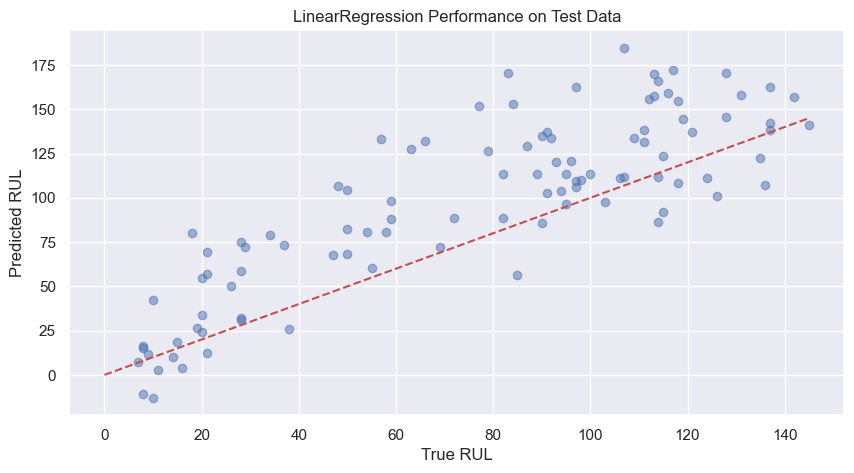

In [9]:
### MODEL TESTING:

# Linear Regression model:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set features and target from train dataframe:
X_train = train.drop(["RUL", "unit_number", "time (cycles)"], axis = 1).dropna(axis = 1) # features
y_train = train["RUL"] # target

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Set test features and target:
X_test = test.dropna(subset = ["RUL_true"])[X_train.columns].fillna(0)
y_test = test.dropna(subset=["RUL_true"])["RUL_true"]
y_test = y_test.reset_index(drop = True)

# Test:
y_pred = linear_model.predict(X_test)

# Compare against NASA score:
def nasa_score(y_true, y_pred):
    return np.sqrt(np.mean(np.where(y_pred > y_true, np.exp(0.1 * (y_pred - y_true)) - 1, (y_true - y_pred)**2)))
score = nasa_score(y_test, y_pred)
print(f"NASA Score: {score:.2f}")

# Plot Linear Regression Model
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, y_test.max()], [0, y_test.max()], "r--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("LinearRegression Performance on Test Data")
plt.show()

Nasa Score:  10.603351452774946


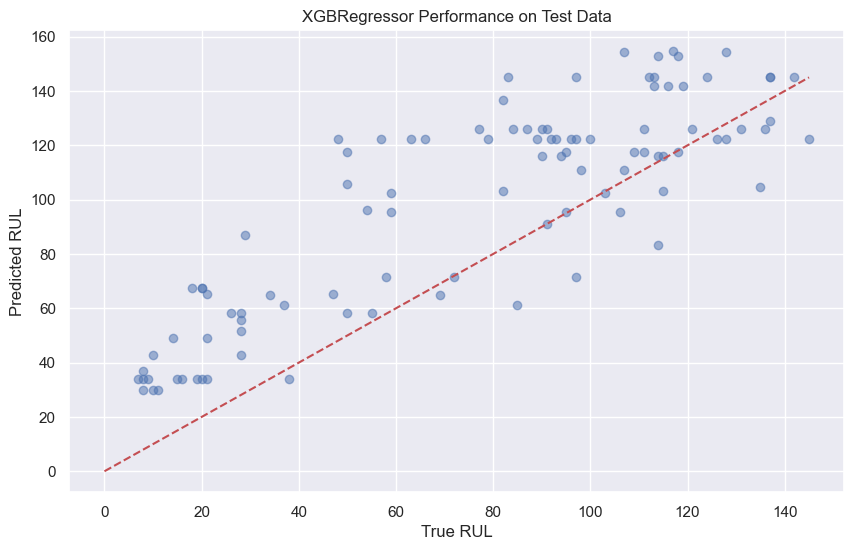

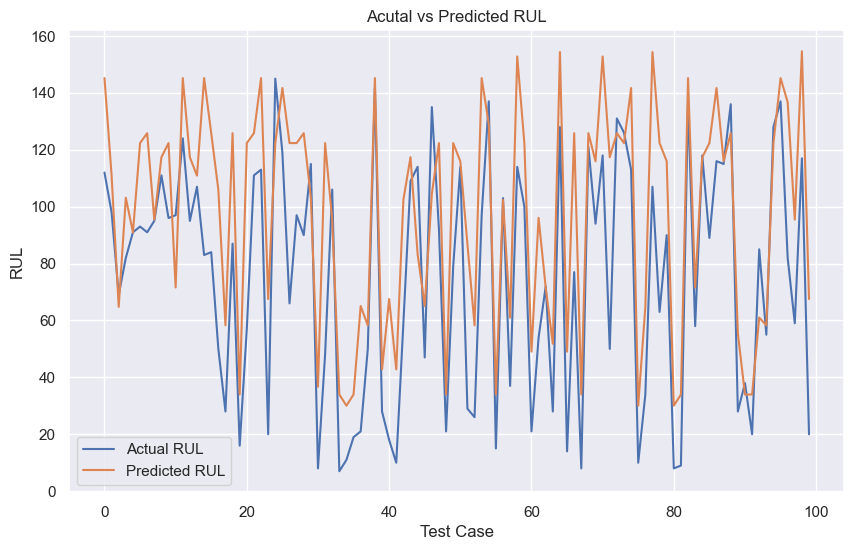

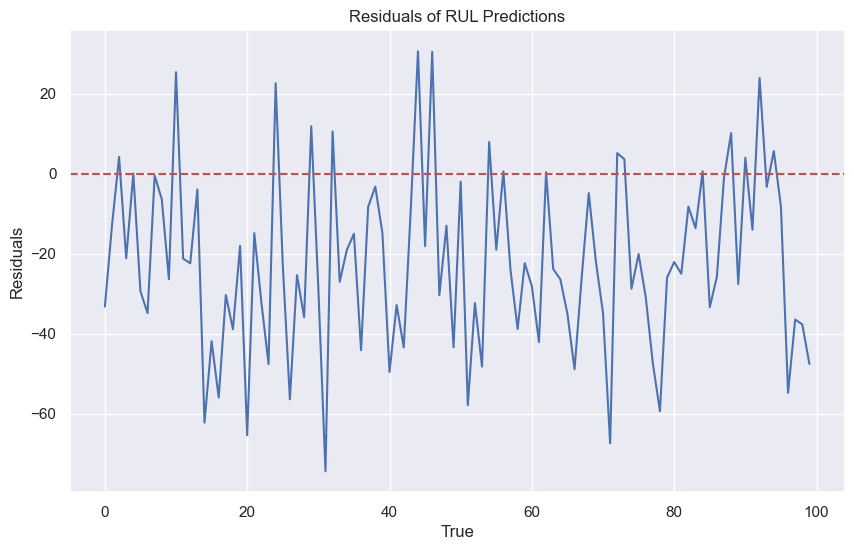

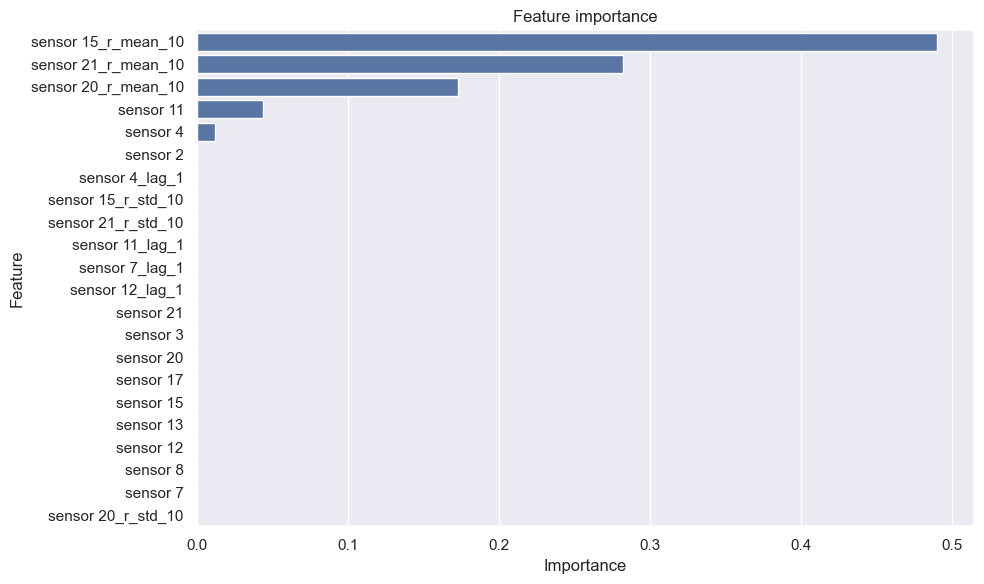

In [10]:
# XGBRegressor model:
from xgboost import XGBRegressor

# hyperparameter tuning:
model_xgb = XGBRegressor(n_estimators = 3, max_depth = 3, learning_rate = 0.4, subsample = 1,
                         colsample_bytree = 1, objective = "reg:squarederror")

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
important_features = X_train.columns[model_xgb.feature_importances_ > 0.01]
print("Nasa Score: ", nasa_score(y_test, y_pred))

# Predicted vs Actual RUL scatterplot:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([0, y_test.max()], [0,y_test.max()], "r--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("XGBRegressor Performance on Test Data")

# Predicted vs Actual RUL line graph:
plt.figure(figsize = (10,6))
plt.plot(y_test.values, label = "Actual RUL")
plt.plot(y_pred, label = "Predicted RUL")
plt.legend()
plt.xlabel("Test Case")
plt.ylabel("RUL")
plt.title("Acutal vs Predicted RUL")
plt.show()

# Residuals graph:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
plt.plot(residuals)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("True")
plt.ylabel("Residuals")
plt.title("Residuals of RUL Predictions")
plt.show()

# Feature importance graph:
importances = model_xgb.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False,inplace=True)
plt.figure(figsize = (10,6))
sns.barplot(x = "Importance", y = "Feature", data = feature_importance_df)
plt.title("Feature importance")
plt.tight_layout()
plt.show()

Nasa Score:  13.54821368572004


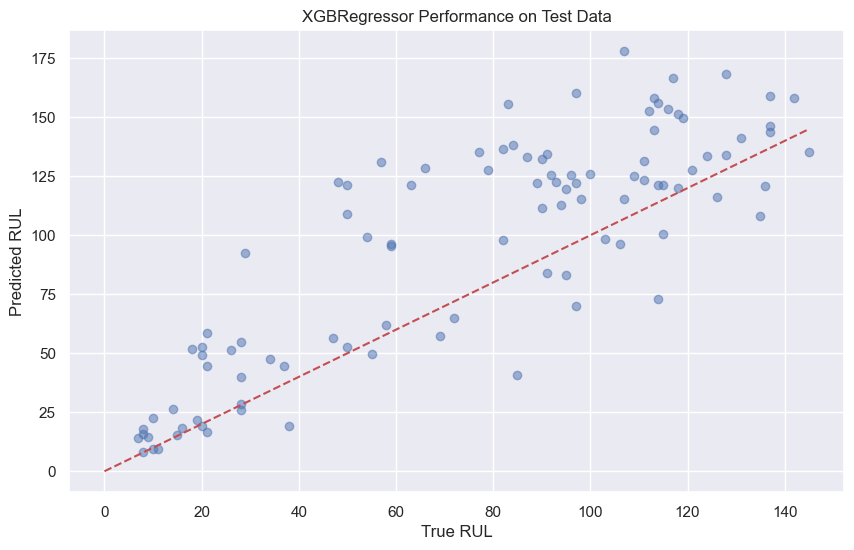

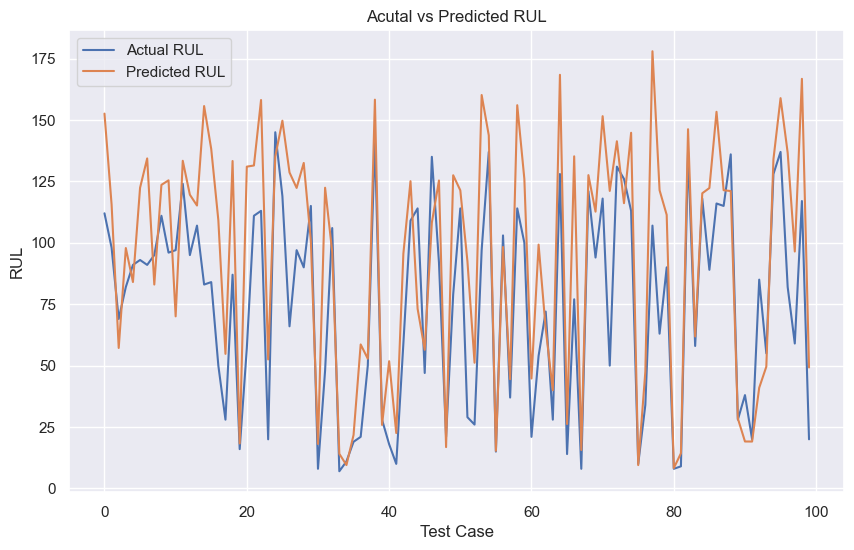

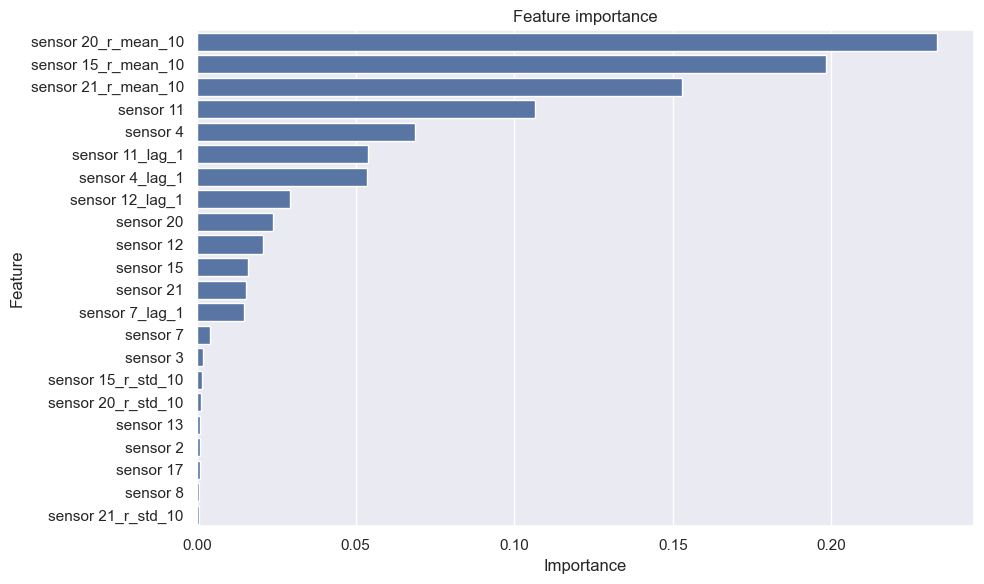

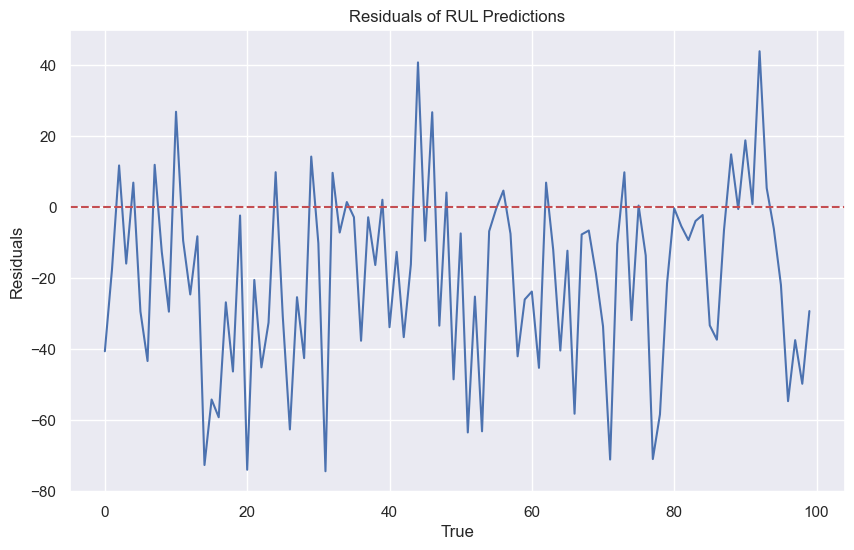

In [11]:
# Random Forest Regressor model:
from sklearn.ensemble import RandomForestRegressor

# Hyper parameter tuning:
model_rf = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split = 10, n_jobs=-1,
                           max_features = "sqrt", random_state = 42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("Nasa Score: ", nasa_score(y_test, y_pred))

# Predicted vs Actual RUL scatterplot:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([0, y_test.max()], [0,y_test.max()], "r--", label = "ok")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("XGBRegressor Performance on Test Data")

# Predicted vs Actual RUL line graph:
plt.figure(figsize = (10,6))
plt.plot(y_test.values, label = "Actual RUL")
plt.plot(y_pred, label = "Predicted RUL")
plt.legend()
plt.xlabel("Test Case")
plt.ylabel("RUL")
plt.title("Acutal vs Predicted RUL")
plt.show()

# Feature importance graph:
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False,inplace=True)
plt.figure(figsize = (10,6))
sns.barplot(x = "Importance", y = "Feature", data = feature_importance_df)
plt.title("Feature importance")
plt.tight_layout()
plt.show()

# Residuals graph:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
plt.plot(residuals)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("True")
plt.ylabel("Residuals")
plt.title("Residuals of RUL Predictions")
plt.show()

In [12]:
### PERFORMANCE BENCHMARKS:

# import time to benchmark:
import time

models = {
    "Linear Regression": linear_model,
    "Random Forest": model_rf,
    "XGBoost": model_xgb}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    results.append({"Model": name, "Training time (s)": f"{training_time:.2f}"})

pd.DataFrame(results)

Model Training time (s)
0  Linear Regression              0.01
1      Random Forest              0.14
2            XGBoost              0.02